# SC42150 - Statistical Signal Processing
## Python Assignment I: Stock Market Analysis

#### Team members

- Name (student number): Maria de Neves de Fonseca (5611679)
- Name (student number): Qingyi Ren (5684803)

---

## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npy` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## Stock market analysis

Lately you've been fascinated by the world of trading so you decided to learn more about it and see if you can learn any good strategies by examining the trading data and looking for patterns.

You are given a `.npy` file containing historical price data of various stocks. We will make the assumption that all the timeseries are just different realizations of the same stochastic process.

You will need to conduct the following steps to complete your investigation, each of which is worth 1 point:

**1. (2 points)** Import the `.npy` file provided using `np.load()` as indicated below. You should now have access to a $N\times K$ array, containing $K$ timeseries of historical price data of various stocks, each of length $N$. Plot the first one and also, in a new figure, plot the first 100 of them together.

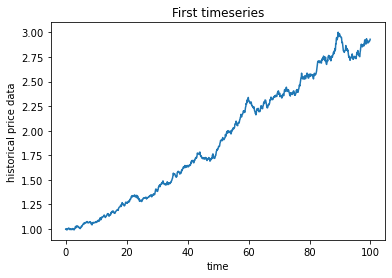

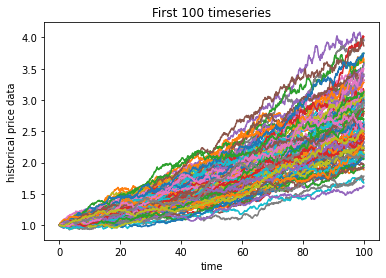

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

data = np.load('data2022.npz')
S =  data['S']
t =  data['t']

plt.figure()
plt.plot(t, S[:,0])
plt.title("First timeseries")
plt.xlabel("time")
plt.ylabel("historical price data")
plt.show()

plt.figure()
plt.plot(t, S[:,:99])
plt.title("First 100 timeseries")
plt.xlabel("time")
plt.ylabel("historical price data")
plt.show()

We will denote the generating stochastic process with $S_{n}\sim f_{S_{n}}$, where $n=t\Delta t$ refers to the time index. Further, we will denote its $k$-th realization with $S_{n}^{k}$.

**2. (5 points)** Compute the ensemble mean and variance and plot each one.

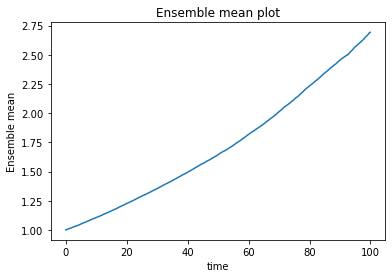

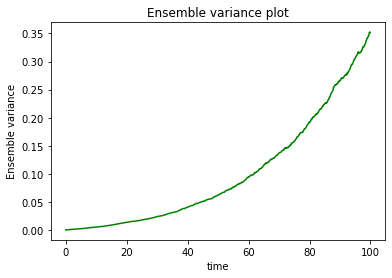

In [2]:
plt.figure()
plt.plot(t, S.mean(1))
plt.title("Ensemble mean plot")
plt.xlabel("time")
plt.ylabel("Ensemble mean")
plt.show()

plt.figure()
plt.plot(t, S.var(1), 'green')
plt.title("Ensemble variance plot")
plt.xlabel("time")
plt.ylabel("Ensemble variance")
plt.show()

**3. (10 points)** Compute the correlation matrix $R_{S}$ and visualize it using the `plt.matshow()` command. What can you deduce from that plot?

<Figure size 432x288 with 0 Axes>

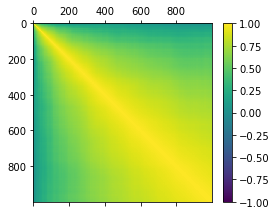

In [14]:
R_s = np.corrcoef(S)

plt.figure()
plt.matshow(R_s)
plt.colorbar(location='right',shrink=0.8)
plt.clim(-1, 1)
plt.show()

> The correlation matrix shows the correlation between all the possible pairs of values of our stochastic process $S_n$. Since we are fascinated by the world of trading and we decided to learn more about it, this is a good tool to use to summarize the trading data, and identify and visualize patterns. 
>
>The correlation coefficient is defined on a scale that varies from + 1 to – 1. For our case, as it can be seen from the plot above, the correlation increases along each diagonal, apart from the main one, from around 0 up to (or close to) 1. When two stocks have a correlation coefficient of 0, it means that there is no relationship between those stocks. So the closest the correlation coefficient is to 0 (green colour), the weaker the correlation is between two stocks. When we have a correlation coefficient of 1 (yellow colour), then the prices of two stocks are perfectly positive correlated, meaning that, historically, the stocks have always moved in the same direction by the same amount. So the closest the correlation coefficient is to 1, the stronger the correlation is between two stocks. In the presence of a correlation coefficient of -1, the correlation between two stocks is perfectly negative, meaning that, historically, the stocks have always moved in the opposite direction, which does not exist in our case. 
>
>So we can conclude that the correlation matrix can be used to predict if the stocks are likely to either move always in the same direction by the same amount, in the opposite direction, or even if there is no relationship between them. So, in our case, the correlation coefficient is a measure of the historical relationship between two stocks, which may give some clues about the future relationship between them as well. However, we can only use this tool to predict our trading data's behaviour to some extent, since this assumes that the relation between stocks does not change over time, which in reality might not be always true. 

**4. (10 points)** Can you determine whether the process $S_{n}$ is WSS or not? Explain why.

> The definition of Wide-Sense Stationarity (WSS) for a single stochastic process is defined as follows (**Definition 5.6** from the reader):
>
>A stochastic process $x(n)$ is Wide-Sense Stationary (WSS) if it satisfies the following three criteria,
>1. $m_x(k) = m_x < \infty$
>2. $r_x(k, l) = r_x(k−l) \forall k,l$
>3. $c_x(0) < \infty$, i.e. its variance is finite.

>From the ensemble mean plot on question 2, one can notice that this parameter changes by shifts in time, tending to $\infty$ when $t \rightarrow \infty$. Therefore, the first criteria is already violated, and we can check straight away that the process $S_n$ is not WSS, since all of them need to be satisfied for the process to be WSS. As for the auto-correlation matrix, it can be seen from the plot from question 3 that the second criteria is also violated, since the auto-correlation function also changes by shifts in time, meaning that two stocks are not related in the same way as we progress in time. From the ensemble variance plot on question 2, the criteria 3 is respected since the variance at instant 0 is finite. However, after analysing all these criteria, it can be concluded that the process is not WSS, since two of them are violated.


A friend of yours who has been into trading for some time now, briefly looks at the data and tells you that the stock price changes can be explained by asset model like the following:
$$
    S_{n+1}=S_{n}e^{(\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{n}},\quad Z_{n}\sim\mathcal{N}(0,1)
    \label{asset_model} \tag{1}
$$
However, you have no idea what this model represents and what values the parameters $\mu$ and $\sigma$ should take. By inspecting the data you can at least infer that $\Delta t=0.1$ time units, so that's a start.

In your efforts to make sense of ([1](#mjx-eqn-asset_model)), you notice that if you divide $S_{n+1}$ by $S_{n}$ and then take the logarithm you end up with

$$
    \log \left( \frac{S_{n+1}}{S_{n}} \right) = (\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t}
    \label{tf_asset_model} \tag{2}
$$

This looks promising so you decide to try this transformation on the data you have.

**5. (3 points)** Apply the transformation $X_{n+1}=\log\left(S_{n+1}/S_{n}\right)$ to your data. Is the resulting system BIBO stable?

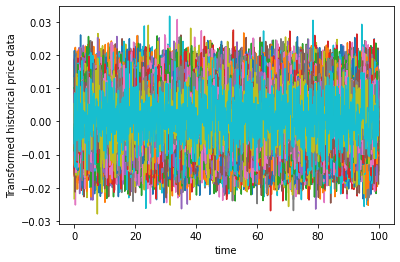

In [4]:
X = np.zeros((len(S[:,0])-1, len(S[0,:])))

for i in range(len(t)-1):
    X[i,:] = np.log(np.divide(S[i+1,:],S[i,:]))
    
plt.figure()
plt.plot(t[0:-1], X)
plt.xlabel("time")
plt.ylabel("Transformed historical price data")
plt.show()

>**Definition 2.5** from the reader:
>A system given by the operator, or mapping $H[−]$ is BIBO (Bounded-input, Bounded-output) stable if any bounded input u(n), satisfying, $\max_n|u(n)|<\infty$ yields a bounded output $y(n)=H[u(n)]$.
>
>From the plot presented above, one can check that the system is BIBO stable for the time interval considered, since every input signal $S$ is bounded, and produces an output signal $X$ which is also bounded. Note that even though this is valid for the limited given data, we cannot say anything about BIBO stability for other input data from $S$ when $t\rightarrow\infty$ since we do not have any knowledge neither on the bounds of that input data or on the bounds of the output. 

**6. (10 points)** Compute and plot the ensemble average and variance for $X_{n}$. Next, compute and plot the time average and variance for a single realization of $X_{n}$, e.g. for $k=1$. Based on the results, what can you say about the ergodicity and stationarity of $X_{n}$?

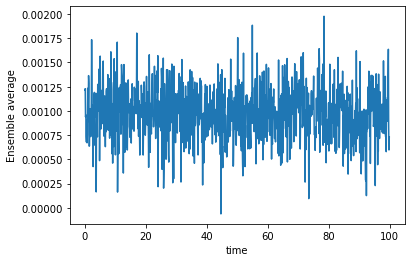

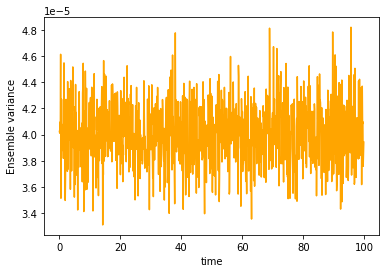

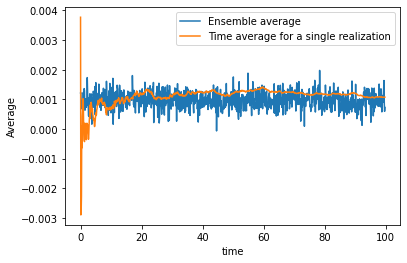

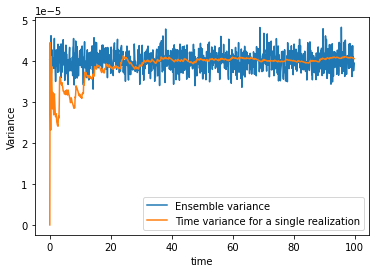

In [5]:
plt.figure()
plt.plot(t[0:-1], X.mean(1))
plt.xlabel("time")
plt.ylabel("Ensemble average")
plt.show()

plt.figure()
plt.plot(t[0:-1], X.var(1), 'orange')
plt.xlabel("time")
plt.ylabel("Ensemble variance")
plt.show()

time_average_sample = [X[0:i+1,0].mean() for i in range(len(X[:,0]))]
time_variance_sample = [X[0:i+1,0].var() for i in range(len(X[:,0]))]

plt.figure()
plt.plot(t[0:-1], X.mean(1), label='Ensemble average')
plt.plot(t[0:-1], time_average_sample, label='Time average for a single realization')
plt.xlabel("time")
plt.ylabel("Average")
plt.legend()
plt.show()

plt.figure()
plt.plot(t[0:-1], X.var(1), label='Ensemble variance')
plt.plot(t[0:-1], time_variance_sample, label='Time variance for a single realization')
plt.xlabel("time")
plt.ylabel("Variance")
plt.legend()
plt.show()

>**Ergodicity**
>
>Ergodicity can be explained as the condition that allows to retrieve Ensemble Averages of a stochastic process from a single realization. When $N$ samples of a realization are available it is denoted as: $\{x(n)\}^{N−1}_{n=0}$. Using these samples we can do the following time average summing over the time index $n$: 
>$$
                    \hat{m}_x(N)=\frac{1}{N}\sum^{N−1}_{n=0}x(N)
$$
>(Definition 5.15 from the reader) When $x(n)$ is a WSS stochastic process, then $x(n)$ is ergodic in the mean, if the time average $\hat{m}_x(N)$ converges in the mean square sense, given as 
$$
                \lim_{N\rightarrow\infty} E[|\hat{m}x(N) − mx|^2]=0
$$
>Based on the results from the plots above, it can be concluded that this process is ergodic in the mean and in the variance, since the time average and variance from a single realization converge to the emsemble average and variance of the stochastic process, respectively. 
>
>**Stationarity**
>
>The notion of time-invariance in the context of stochastic process is called stationarity. On the reader, two definitions of stationarity are presented: first-orded stationarity and second-order stationarity. 
>
>**(Definition 5.2)** First-order Stationarity:A stochastic process $x(n)$ with individual pdf $f_{x(n)}(\alpha)$ is first-order stationary if and only if
$$ 
                f_{x(n)}(\alpha)=f_{x(n+k)}(\alpha) \quad \forall k
$$
>If the stochastical process $x(n)$ with individual pdf $f_{x(n)}(\alpha)$ is first-order stationary, then its mean is constant.
>
>**(Definition 5.4)** Second-order Stationarity:A stochastic process $x(n)$ with mutual pdf $f_{x(n_1),x(n_2)}(\alpha_1,\alpha_2)$ is second-order stationary if and only if
$$ 
                f_{x(n_1),x(n_2)}(\alpha_1,\alpha_2)=f_{x(n_1+k),x(n_2+k)}(\alpha_1,\alpha_2) \quad \forall k
$$
>If the stochastical process $x(n)$ with mutual pdf $f_{x(n_1),x(n_2)}(\alpha_1,\alpha_2)$ is second-order stationary, then its Auto-correlation fuction $r_x(k,l)$ only depends on the difference $k-l$
$$ 
                r_x(k, l) = rx(k−l) \quad \forall k,l.
$$ 
>
>From the plots of ensemble mean and variance, we can check that these two moments are relatively constant over time. However, bearing in mind the notions presented above and the results from the plots, we can only conclude that our process is first-order stationary (constant mean). Since from the results we cannot check the behaviour of the autocorrelation function, we cannot conclude if the process is second-order stationary or not. 

**7. (10 points)** Compute the correlation matrix $R_{X}$ and visualize it using the `plt.matshow()` command.

   Can you determine whether the process $X_{n}$ is WSS? If so, what are its first moments, i.e. mean and variance? 

   Express $\mathbb{E}(X)$ and $\mathrm{Var}(X)$ analitically in terms of $\mu$, $\sigma$ and $\Delta t$.

<Figure size 432x288 with 0 Axes>

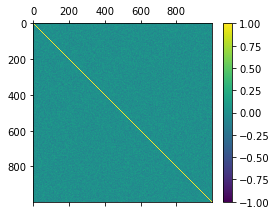

Mean = 0.000968581019325197
Variance = 4.0065130260081425e-05


In [6]:
R_x = np.corrcoef(X)
plt.figure()
plt.matshow(R_x)
plt.colorbar(location='right',shrink=0.8)
plt.clim(-1, 1)
plt.show()

print('Mean =',X.mean())
print('Variance =',X.var())

> As said before, Wide-Sense Stationarity (WSS) for a single stochastic process is defined as follows:
>
>A stochastic process x(n) is Wide-Sense Stationary (WSS) if it satisfies the following three criteria,
>1. $m_x(k) = m_x < \infty$
>2. $r_x(k, l) = r_x(k−l) \quad \forall k,l$
>3. $c_x(0) < \infty$, i.e. its variance is finite.
>
>In other words, a WSS process presents constant mean over time, finite variance and its auto-correlation fuction $r_x(k,l)$ only depends on the difference $k-l$.
>
>In the previous question, we concluded from the ensemble mean plot that the process $X_{n}$ has constant mean. Therefore, the first criteria for WSS processes is satisfied. As for the auto-correlation matrix, it can be seen from the plot above that the matrix is symmetric in both diagonal directions and, thus, the second criteria is also satisfied, since the autocorrelation is the same for the same difference $k-l$. From the ensemble variance plot on question 6, the criteria 3 is also respected since the variance is finite. So, if the mean and auto-correlation functions of this process do not vary with respect to time and its variance is finite for all times, we can conlcude that all criteria are satisfied and, therefore, the process $X_n$ is WSS.
>
> As for expressing $\mathbb{E}(X)$ and $\mathrm{Var}(X)$ analitically in terms of $\mu$, $\sigma$ and $\Delta t$, we have that for $Z_{n}\sim\mathcal{N}(0,1) \rightarrow \mathbb{E}(Z)=0$ and $\mathbb{E}[(Z-\mathbb{E}(Z))^2]=\mathbb{E}(X^2)-\mathbb{E}(X)^2=\mathbb{E}(Z^2)=1$, thus:
>
>$$
\begin{align}
\mathbb{E}(X) &= \mathbb{E}((\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t})\\ &= \mathbb{E}((\mu-0.5\sigma^{2})\Delta t)+\mathbb{E}(\sigma\sqrt{\Delta t}Z_{t})\\&=(\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}\mathbb{E}(Z_{t})\\&=(\mu-0.5\sigma^{2})\Delta t\\
\mathrm{Var}(X) &= \mathbb{E}[(X-\mathbb{E}(X))^2] \\&= \mathbb{E}[X^2-2X\mathbb{E}(X)+\mathbb{E}(X)^2]\\ &= \mathbb{E}(X^2)-2\mathbb{E}(X)^2+\mathbb{E}(X)^2 \\&= \mathbb{E}(X^2) - \mathbb{E}(X)^2 \\&= \mathbb{E}[((\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t})^2]-((\mu-0.5\sigma^{2})\Delta t)^2 \\&= \mathbb{E}[(\mu-0.5\sigma^{2})\Delta t)^2+2\sigma\sqrt{\Delta t}Z_{t}(\mu-0.5\sigma^{2})\Delta t+(\sigma\sqrt{\Delta t}Z_{t})^2]-((\mu-0.5\sigma^{2})\Delta t)^2\\&= ((\mu-0.5\sigma^{2})\Delta t)^2 -((\mu-0.5\sigma^{2})\Delta t)^2 +2\sigma\sqrt{\Delta t}\mathbb{E}(Z_{t})(\mu-0.5\sigma^{2})\Delta t+\sigma^2\Delta t\mathbb{E}(Z_{t}^2)\\ &= \sigma^2\Delta t
\end{align}
$$
>

**8. (10 points)** Choose one of the transformed timeseries $X_{n}$, compute its auto-correlation function $r_{x}({k})$ and visualize it. Verify whether **Properties 5.8 - 5.10** apply to this process.

**Note:** if the signal $x(n)$ is auto-correlation ergodic,
the auto-correlation function $r_x(k)$ can be estimated as
(if we have only values $x_1, x_2, \dots, x_N$):

$$
    r_x(k) = \frac{1}{N-k} \sum_{i=k+1}^{N} x(i) x^*(i-k)
$$

You may also use Numpy's built in functions such as numpy.correlate(), though you should be careful to read the documentation beforehand.

**Note:** if you are unfamiliar with python, take care when copying `np.arrays`. Read more [here](https://numpy.org/doc/stable/reference/generated/numpy.copy.html).

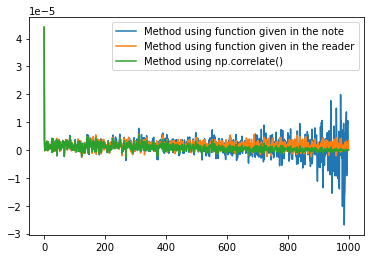

---> check Property 5.8 using the numpy.correlate() function
---> check Property 5.9
-Method using function given in the note rx(0)= 4.405731342334148e-05
-Method using function given in the reader rx(0)= 4.404315395103571e-05
-Method using np.correlate() rx(0)= 4.406307412119192e-05
E[|x^2|]= 4.406307412119192e-05
---> check Property 5.10
-Method using function given in the note max= 4.405731342334148e-05
-Method using function given in the reader max= 4.404315395103571e-05
-Method using np.correlate() max= 4.406307412119192e-05
-Method using function given in the note rx(0)= 4.405731342334148e-05
-Method using function given in the reader rx(0)= 4.404315395103571e-05
-Method using np.correlate() rx(0)= 4.406307412119192e-05


In [7]:
N = len(X[:,399])

X_400 = X[:,399]
r_x_1 = []
r_x_2 = []

for k in range(0,N):
    a = 0
    for i in range(k+1,N):
        a = a + X_400[i]*np.conjugate(X_400[i-k])

    r_x_1.append(1/(N-k)*a)
    

for k in range(0,N):
    a = 0
    for i in range(0,N-1):
        a = a + X_400[i]*np.conjugate(X_400[i-k])

    r_x_2.append(1/N*a)
    
correlation = np.correlate(X_400, X_400, mode='full')
r_x_3 = correlation*1/N

x_axis = np.linspace(0,N,N)
plt.plot(x_axis, r_x_1, label='Method using function given in the note')
plt.plot(x_axis, r_x_2, label='Method using function given in the reader')
plt.plot(x_axis, r_x_3[998:], label='Method using np.correlate()')
plt.legend()
plt.show()

print("---> check Property 5.8 using the numpy.correlate() function")
for i in range(0,N-1):
    if round(r_x_3[i],5)!=round(r_x_3[-(i+1)],5):
        print("Property 5.8 does not apply")

print("---> check Property 5.9")
print("-Method using function given in the note rx(0)=", r_x_1[0])
print("-Method using function given in the reader rx(0)=", r_x_2[0])
print("-Method using np.correlate() rx(0)=", r_x_3[998])

var = X_400.var()
mean = X_400.mean()
E = var + mean**2
print("E[|x^2|]=",E)

print("---> check Property 5.10")
print("-Method using function given in the note max=", max(r_x_1))
print("-Method using function given in the reader max=", max(r_x_2))
print("-Method using np.correlate() max=", max(r_x_3))
print("-Method using function given in the note rx(0)=", r_x_1[0])
print("-Method using function given in the reader rx(0)=", r_x_2[0])
print("-Method using np.correlate() rx(0)=", r_x_3[998])

>**Property 5.8** (Symmetry): If $x(n)$ is a complex stochastic process that is WSS, then its
Auto-correlation function is conjugate symmetric, i.e.
>$$
r_x(k)=r_x^*(-k)
$$
>
>If $x(n)$ is real and WSS, then its Auto-correlation function is symmetric, i.e.
>$$
r_x(k)=r_x(-k)
$$
>
>**Property 5.9** (Non-negative Variance): If $x(n)$ is a complex stochastic process that is
WSS, then its Variance is non-negative, i.e.
>$$
r_x(0) = E[|x(n)|^2] \geq 0
$$
>
>**Property 5.10** (Maximum): If $x(n)$ is a complex stochastic process that is WSS, then
its Auto-correlation function reaches its maximum value for lag 0, i.e.
>$$
r_x(0)\geq |r_x(k)| \quad \forall k
$$
>
>To solve this exercise, three different methods were used to compute the auto-correlation function $r_x(k)$ for one of the transformed timeseries $X_n$. 
>
>The first one is defined in the note as 
>$$
    r_x(k) = \frac{1}{N-k} \sum_{i=k+1}^{N} x(i) x^*(i-k)
$$
>For this auto-correlation function, when $k\rightarrow N$ we have that $r_x(k)\rightarrow\infty$. This is why in the plot we can see that the auto-correlation starts to increase for higher values of k. 
>
>The second method was defined as in the reader 
>$$
    r_x(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(i)x^∗(i−k)
$$
>
> For the last method the Numpy's built in functions such as numpy.correlate() were used. For this case, numpy.correlate() computes the correlation as generally defined 
>$$
    c_k = \sum_{n} x(n+k)x^∗(n), \quad c_{-k} = \sum_{n} x(n)x^∗(n+k)
$$
>Note that if we look at the previous definition from the reader, we can see that we have to divide this result by $N$ to get the auto-correlation function. 
>
>All the properties, but 5.8, were checked for all the methods. Property 5.8 was only checked for the method using numpy.correlate() since this already obtains the values of the auto-correlation function for $k$ negative. For the other methods the functions needed to be changed in order to compute $r_x(k)$ for $k<0$. 
>
>To check property 5.8, all the values of $r_x(k)$ for $k<0$ were compared to the ones for $k>0$. This led to the conclusion that $r_x(k)=r_x(-k)$ and, thus, this property applies to this process. 
>
>To check property 5.9, $E[|x(n)|^2]$ was computed and compared to $r_x(0)$ for all methods. From this, we can conclude that this property also applies to this process since $E[|x(n)|^2]=r_x(0)$. Note that the small differences in the values of $r_x(0)$ for the different methods are related to the fact that we are using limited data sets and samples, and the functions from the reader and the note are derived for ilimited data sets. 
>
>To check property 5.10, the maximum value of the auto-correlation function was computed for every method, and from that we can conclude that this property also applies to our process since the maximum value is the same as $r_x(0)$ and, therefore, all the other values are smaller or equal (in absolute value) to $r_x(0)$.

**9. (10 points)** Calculate the Periodogram for the timeseries selected above. How does the Power Spectrum relate to the Autocorrelation function plotted above? 

Can you show that the total power of the signal is equal to the $r_x(0)$ value computed above? (**Note:** the value may not be precisely equal because you are using limited data sets and samples)

**Hint:** be careful with the indexing. You can use *numpy.fft.fft()* and *numpy.fft.fftfreq()* functions.

**Hint 2:** the resulting periodogram may not be represented in $\mathrm{rad/sample}$, but rather in $\mathrm{cycles/unit\ time}$. Be careful with the representation of your periodogram when calculating its integral / sum.

Total power = 4.4048141720430126e-05


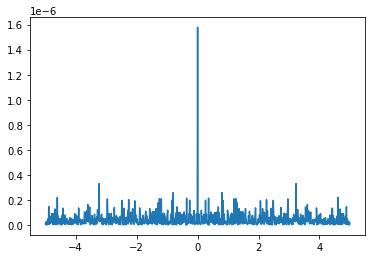

In [8]:
ps = np.abs(np.fft.fft(r_x_2))**2

time_step = 0.1
freqs = np.fft.fftfreq(len(r_x_2), time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], np.sqrt(ps[idx])/len(r_x_2))

print("Total power =", sum(np.sqrt(ps)/len(r_x_2)))

According to ([2](#mjx-eqn-tf_asset_model)), $X_{t}$ should be Gaussian White Noise since $Z_{t}$ is a Gaussian ZMWN. However, since you are only given data, it's good that you verify this. Remember that a stochastic process is Gaussian if the joint distribution of any combination of elements of $X_n$ is Gaussian. For now we will just take two random time instances to verify this, but feel free to try other combinations as well.

**10. (5 points)** Take two time instances of $X_{n}$, e.g. for $n=\{30,70\}$, and plot their 2d histogram across $K$ realizations $\{X_{n}^{k}\}_{k=1}^{K}$ by using $\sqrt{K}$ bins. Can you adequately fit a multivariate normal distribution on this histogram?

**Hint:** You may want to look into multivariate_normal.pdf() to help plot the levels of fitting distribution in 2D. To plot the experimental values, you may use plt.hist2d().

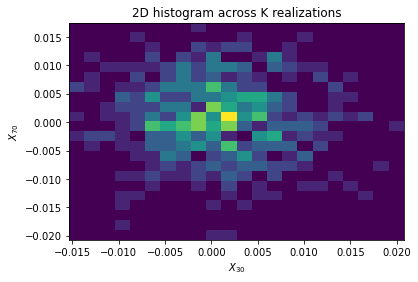

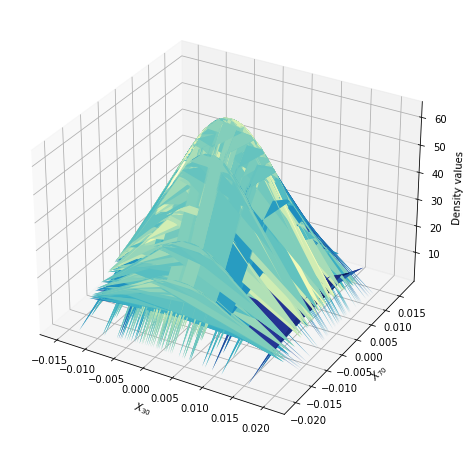

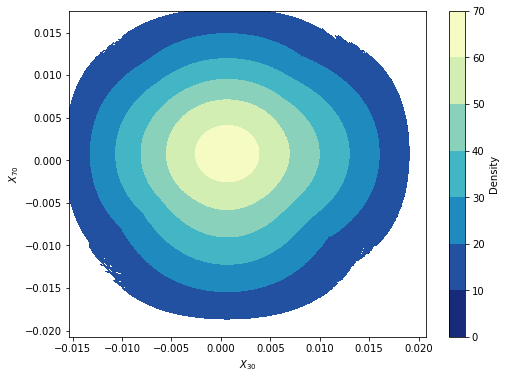

In [9]:
k = len(X[29,:])

# Plot the 2D histogram
plt.figure()
plt.hist2d(X[29,:], X[69,:], int(np.sqrt(k)))
plt.xlabel("$X_{30}$")
plt.ylabel("$X_{70}$")
plt.title("2D histogram across K realizations")
plt.show()

#plot the PDF in 3D and 2D
X_30, X_70 = np.meshgrid(X[29,:], X[69,:])
pos = np.dstack((X_30, X_70))
mu = np.array([np.mean(X[29,:]), np.mean(X[69,:])])
cov = np.array([np.cov(X[29,:]), np.cov(X[69,:])])
Z = multivariate_normal.pdf(pos,mu,cov)
ax = plt.figure(figsize=(10,8)).add_subplot(111, projection='3d')
ax.plot_surface(X_30, X_70, np.sqrt(Z), cmap = 'YlGnBu_r')
plt.xlabel("$X_{30}$")
plt.ylabel("$X_{70}$")
ax.set_zlabel('Density values')
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(X_30, X_70, np.sqrt(Z), cmap='YlGnBu_r')
plt.colorbar(location='right',label='Density')
plt.xlabel("$X_{30}$")
plt.ylabel("$X_{70}$")
plt.show()

**11. (5 points)** Now verify that the marginals of the above distribution are also Gaussians, that is take the (1d) histograms of the above time instances (with $\sqrt{K}$ bins), plot them, and also fit the correspoding PDFs on top.

**Hint:** You may want to look into multivariate_normal.pdf() to help plot the levels of fitting distribution in 2D. To plot the experimental values, you may use plt.hist2d().

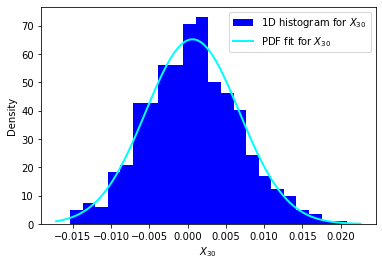

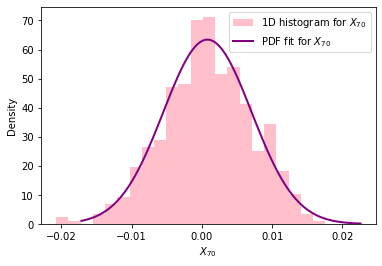

In [12]:
k = len(X[29,:])

plt.figure()
#plot the histogram
plt.hist(X[29,:], int(np.sqrt(k)), density='true', color='blue', label='1D histogram for $X_{30}$')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = multivariate_normal.pdf(x, mean=np.mean(X[29,:]), cov=np.cov(X[29,:]))
plt.plot(x, p1, linewidth=2, color='cyan', label='PDF fit for $X_{30}$')
plt.legend()
plt.xlabel("$X_{30}$")
plt.ylabel("Density")
plt.show()

plt.figure()
#plot the histogram
plt.hist(X[69,:], int(np.sqrt(k)), density='true', color='pink', label='1D histogram for $X_{70}$')
# Plot the PDF
p2 = multivariate_normal.pdf(x, mean=np.mean(X[69,:]), cov=np.cov(X[69,:]))
plt.plot(x, p2, linewidth=2, color='purple', label='PDF fit for $X_{70}$')
plt.legend()
plt.xlabel("$X_{70}$")
plt.ylabel("Density")
plt.show()


From ([1](#mjx-eqn-asset_model)), it follows that the first two statistical moments can be computed analytically:
\begin{align}
    \mathbb{E}\left[S_{n}\right] &= S_{0}e^{\mu n\Delta t} \label{asset_mean} \tag{3}\\
    \text{Var}\left[S_{n}\right] &= S_{0}^{2}e^{2\mu n\Delta t}\left(e^{\sigma^{2}n\Delta t}-1\right) \label{asset_var} \tag{4}
\end{align}
Having computed the ensemble mean and variance of $X_{n}$ you should be able to determine estimates for the values of $\mu$ and $\sigma$.

**12. (10 points)** Using the results from Question 7, compute estimates for $\mu$ and $\sigma$. Use those estimates to calculate the moments ([3](#mjx-eqn-asset_mean))-([4](#mjx-eqn-asset_var)) and plot those along with the ensemble moments of $S_{n}$ of Question 2.

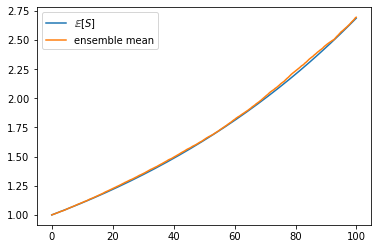

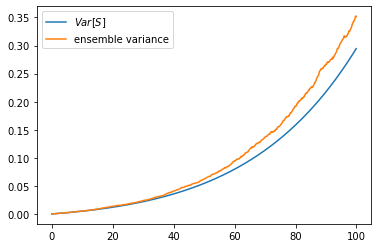

In [11]:
mu = X.mean()/0.1+0.5*X.var()/0.1
sigma_2 = X.var()/0.1

plt.figure()
plt.plot(t, S[0,0]*np.exp(mu*t), label='$\mathbb{E}[S]$')
plt.plot(t, S.mean(1), label='ensemble mean')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, S[0,0]**2*np.exp(mu*t*2)*(np.exp(sigma_2*t)-1), label='$Var[S]$')
plt.plot(t, S.var(1), label='ensemble variance')
plt.legend()
plt.show()

**13. (10 points)** Having done all the above, you should now be in a position where you can discuss whether the model your friend suggested was good enough to describe the data.

>In question 7 we defined $\mathbb{E}(X)$ and $\mathrm{Var}(X)$ of $X_n$ analitically in terms of $\mu$, $\sigma$ and $\Delta t$. In the same question, we also calculated the values for the first moments of the process $X_n$, i.e. mean and variance. Having this, we were able to compute the estimate value of $\mu$ and $\sigma$, which was used to calculate the first two statistical moments of $S_n$ in question 12 as follows:
>$$
\begin{align}
\mathbb{E}(X) &=(\mu-0.5\sigma^2 )\Delta t \Leftrightarrow \mu = \frac{\mathbb{E}(X)}{\Delta t}+0.5\frac{\mathrm{Var}(X)}{\Delta t}\\
\mathrm{Var}(X) &= \sigma^2\Delta t \Leftrightarrow \sigma^2 =\frac{\mathrm{Var}(X)}{\Delta t}\\
\mathbb{E}\left[S_{n}\right] &= S_{0}e^{\mu n\Delta t}\\
\text{Var}\left[S_{n}\right] &= S_{0}^{2}e^{2\mu n\Delta t}\left(e^{\sigma^{2}n\Delta t}-1\right)\\
\end{align}
$$ 
>
>In the plot from question 12 we can check if the moments computed by using the $\mu$ and $\sigma$ estimates are good approximations of the ensemble mean and variance of the process $S_n$ obtained in question 2. Related to the mean, we can see from the plot that $\mathbb{E}\left[S_{n}\right]$ is relatively close to the ensemble mean of the process $S_n$ and, thus, we can conclude that the model our friend suggested is good enough to describe the ensemble mean of the data. However, when looking at the variance, one can notice that $\text{Var}\left[S_{n}\right]$ gets further from the ensemble variance of the process $S_n$ as time increases. Thus, we can conclude that the model our friend suggested might not be the best fit for the ensemble variance of the data.